In [3]:
import numpy as np
import pandas as pd 
import pyphot

In [9]:
pd.read_pickle('CWW_HDFN_prior.pkl')

{'fo_arr': array([0.35, 0.5 ]),
 'kt_arr': array([0.45 , 0.147]),
 'zo_arr': array([0.431 , 0.39  , 0.0626]),
 'km_arr': array([0.0913, 0.0636, 0.123 ]),
 'a_arr': array([2.465, 1.806, 0.906]),
 'mo': 20.0,
 'nt_array': [1, 2, 5]}

In [10]:
cd DESC_BPZ-main/

/Users/bryan/Desktop/DESC_BPZ-main


In [11]:
ls

LICENSE         pyproject.toml  src/
README.md       setup.py        tests/


In [12]:
cd src

/Users/bryan/Desktop/DESC_BPZ-main/src


In [13]:
ls

desc_bpz/


In [14]:
cd desc_bpz/

/Users/bryan/Desktop/DESC_BPZ-main/src/desc_bpz


In [15]:
ls

MLab_coe_py3.py*    coetools_py3.py*    paths.py            spline_py3.py*
__init__.py         compress2_py3.py*   prior_from_dict.py  useful_py3.py*
bpz_tools_py3.py*   data_files/         prior_hdfn_gen.py   version.py
coeio_py3.py*       func_py3.py*        scripts/            will_tools_py3.py*


In [16]:
cd data_files

/Users/bryan/Desktop/DESC_BPZ-main/src/desc_bpz/data_files


In [17]:
ls

AB/     FILTER/ SED/


In [72]:
ls

DC2LSST_g.res  DC2LSST_r.res  DC2LSST_y.res
DC2LSST_i.res  DC2LSST_u.res  DC2LSST_z.res


In [71]:
filelist = ['SB2_B2004a.sed', 'Scd_B2004a.sed', 
'El_B2004a.sed', 'SB3_B2004a.sed', 'Im_B2004a.sed',      
'Sbc_B2004a.sed', ]

SB2_B2004a.sed
Scd_B2004a.sed
El_B2004a.sed
SB3_B2004a.sed
Im_B2004a.sed
Sbc_B2004a.sed


(0.0, 10000.0)

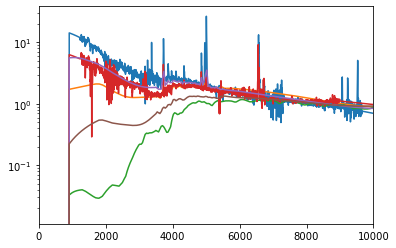

In [65]:
templates = {}

for filename in filelist:
    
    print(filename)
    
    waves = pd.read_csv(filename, delimiter = ' ')['0.0']
    fluxes = pd.read_csv(filename, delimiter = ' ')['0.0.1']
    
    templates[filename] = waves, fluxes
    
    plt.semilogy(waves, fluxes)

plt.xlim(0, 10000)

In [73]:
from pyphot import (unit, Filter)

wave = [4499, 4500, 4700, 4701] * unit['AA']
transmit = [0., 1., 1., 0.]
tophat = Filter(wave, transmit, name='tophat', dtype='photon', unit='Angstrom')
flux_tophat = tophat.get_flux(wavelength, flux)

TypeError: only integer scalar arrays can be converted to a scalar index

In [112]:
LSST_filters = ['DC2LSST_g.res', 'DC2LSST_r.res', 'DC2LSST_y.res', 'DC2LSST_i.res', 'DC2LSST_z.res']

transmission_wavelength = pd.read_csv(LSST_filters[0], delimiter = ' ')['#Wavelength(AA)']
transmission = pd.read_csv(LSST_filters[0], delimiter = ' ')['Transmission']

In [93]:
LSST_G = Filter(transmission_wavelength, transmission, name='LSST_G', unit='Angstrom')

In [97]:
fluxes = LSST_G.get_flux(np.array(templates['SB2_B2004a.sed'][0]), np.array(templates['SB2_B2004a.sed'][1]), axis=0)

In [99]:
ABmag=-2.5*np.log10(fluxes)-LSST_G.AB_zero_mag

In [106]:
for fil in LSST_filters:
    print(fil)

DC2LSST_g.res
DC2LSST_r.res
DC2LSST_y.res
DC2LSST_i.res
DC2LSST_u.res
DC2LSST_z.res


In [285]:
mags = []
mags_dict = {}

for template in filelist: 
    
    print(template)
    for fil in LSST_filters: 
    
        print(fil)
    
        transmission_wavelength = pd.read_csv(fil, delimiter = ' ')['#Wavelength(AA)']
        transmission = pd.read_csv(fil, delimiter = ' ')['Transmission']
    
        LSST_fil = Filter(transmission_wavelength, transmission, unit='Angstrom')
        
        fluxes = LSST_fil.get_flux(np.array(templates[template][0]), np.array(templates[template][1]), axis=0)
    
        ABmag=-2.5*np.log10(fluxes)
    
        mags.append(ABmag)
    mags_dict[template] = np.diff(mags)

SB2_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
Scd_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
El_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
SB3_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
Im_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
Sbc_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res


In [121]:
mags_dict

{'SB2_B2004a.sed': array([-0.11118664, -0.22695697,  0.21514785, -0.15124183]),
 'Scd_B2004a.sed': array([-0.41648171, -0.31137859,  0.11751674, -0.05407989]),
 'El_B2004a.sed': array([-0.6932412 , -0.67564111,  0.31943232, -0.20533849]),
 'SB3_B2004a.sed': array([-0.38075186, -0.50326433,  0.41029608, -0.2589207 ]),
 'Im_B2004a.sed': array([-0.19490238, -0.34099667,  0.17490197, -0.08703323]),
 'Sbc_B2004a.sed': array([-0.53474596, -0.64081681,  0.34973268, -0.16437906])}

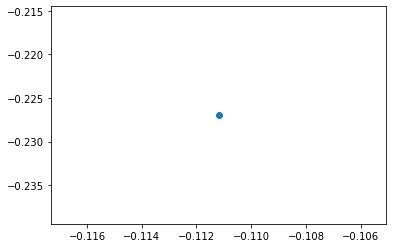

In [122]:
plt.scatter(mags_dict['SB2_B2004a.sed'][0], mags_dict['SB2_B2004a.sed'][1])

In [254]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.luminosity_distance(4) 

<Quantity 35851.83207232 Mpc>

In [263]:
cosmo.luminosity_distance(0.01).value**2

1862.6332545240057

In [286]:
mags = []
mags_dict = {}
redshift_dict = {}

redshifts = np.linspace(0.01, 3, 100)

for template in filelist: 
    
    print(template)
    
    redshift_dict = {}
    
    for z in redshifts:
        
        print(z)
        
        mags = []
    
        for fil in LSST_filters: 
    
            print(fil)
    
            transmission_wavelength = pd.read_csv(fil, delimiter = ' ')['#Wavelength(AA)']
            transmission = pd.read_csv(fil, delimiter = ' ')['Transmission']
    
            LSST_fil = Filter(transmission_wavelength, transmission, unit='Angstrom')
    
        
            fluxes = LSST_fil.get_flux((1+z)*np.array(templates[template][0]), np.array(templates[template][1])/(4*np.pi*cosmo.luminosity_distance(z).value**2) , axis=0)
    
            ABmag=-2.5*np.log10(fluxes) #-LSST_fil.AB_zero_mag
    
            mags.append(ABmag)
        
        redshift_dict[z] = np.diff(mags)
        
    mags_dict[template] = redshift_dict

SB2_B2004a.sed
0.01
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.040202020202020204
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.07040404040404041
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.10060606060606062
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.13080808080808082
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.16101010101010105
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.19121212121212125
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.22141414141414145
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.2516161616161616
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.28181818181818186
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.3120202020202021
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.342222222

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9462626262626264
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9764646464646466
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.0066666666666668
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.036868686868687
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.0670707070707073
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.0972727272727274
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.1274747474747475
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.1576767676767679
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.187878787878788
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2180808080808083
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2482828282828284
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i

DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8825252525252527
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.912727272727273
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.9429292929292932
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.9731313131313133
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.0033333333333334
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.0335353535353535
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.0637373737373736
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.0939393939393938
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1241414141414143
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1543434343434344
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1845454545454546
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_

DC2LSST_y.res
2.818787878787879
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.848989898989899
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.8791919191919195
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.9093939393939396
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.9395959595959598
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.96979797979798
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
3.0
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
Scd_B2004a.sed
0.01
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.040202020202020204
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.07040404040404041
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.10060606060606062
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.13080808080808082
D

DC2LSST_z.res
DC2LSST_y.res
0.7650505050505052
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7952525252525253
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.8254545454545456
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.8556565656565658
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.885858585858586
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9160606060606061
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9462626262626264
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9764646464646466
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.0066666666666668
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.036868686868687
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.0670707070707073
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y

DC2LSST_z.res
DC2LSST_y.res
1.7315151515151517
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.761717171717172
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.7919191919191921
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8221212121212123
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8523232323232326
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8825252525252527
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.912727272727273
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.9429292929292932
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.9731313131313133
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.0033333333333334
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.0335353535353535
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.697979797979798
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.7281818181818185
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.7583838383838386
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.7885858585858587
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.818787878787879
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.848989898989899
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.8791919191919195
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.9093939393939396
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.9395959595959598
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.96979797979798
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
3.0
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res

0.6140404040404042
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.6442424242424243
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.6744444444444445
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7046464646464647
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.734848484848485
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7650505050505052
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7952525252525253
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.8254545454545456
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.8556565656565658
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.885858585858586
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9160606060606061
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9462626262626264
DC2L

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5805050505050506
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.610707070707071
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.640909090909091
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.6711111111111112
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.7013131313131316
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.7315151515151517
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.761717171717172
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.7919191919191921
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8221212121212123
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8523232323232326
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8825252525252527
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.

2.5167676767676768
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.546969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.5771717171717174
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.6073737373737376
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.6375757575757577
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.667777777777778
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.697979797979798
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.7281818181818185
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.7583838383838386
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.7885858585858587
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.818787878787879
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.848989898989899
DC2LSST

0.46303030303030307
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.4932323232323233
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5234343434343435
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5536363636363637
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5838383838383839
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.6140404040404042
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.6442424242424243
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.6744444444444445
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7046464646464647
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.734848484848485
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7650505050505052
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7952525252525253
DC

DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.45969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.48989898989899
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5201010101010104
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5503030303030305
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5805050505050506
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.610707070707071
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.640909090909091
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.6711111111111112
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.7013131313131316
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.7315151515151517
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.761717171717172
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res


DC2LSST_y.res
2.395959595959596
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4261616161616164
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4563636363636365
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4865656565656566
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.5167676767676768
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.546969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.5771717171717174
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.6073737373737376
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.6375757575757577
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.667777777777778
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.697979797979798
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.728181818

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.34222222222222226
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.3724242424242425
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.40262626262626267
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.4328282828282829
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.46303030303030307
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.4932323232323233
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5234343434343435
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5536363636363637
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5838383838383839
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.6140404040404042
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.6442424242424243
DC2LSST_g.res
DC2LSST_r.res
DC2L

DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.308686868686869
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.338888888888889
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.3690909090909094
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.3992929292929295
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.4294949494949496
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.45969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.48989898989899
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5201010101010104
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5503030303030305
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5805050505050506
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.610707070707071
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res


DC2LSST_z.res
DC2LSST_y.res
2.2751515151515154
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3053535353535355
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3355555555555556
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3657575757575757
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.395959595959596
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4261616161616164
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4563636363636365
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4865656565656566
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.5167676767676768
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.546969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.5771717171717174
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.22141414141414145
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.2516161616161616
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.28181818181818186
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.3120202020202021
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.34222222222222226
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.3724242424242425
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.40262626262626267
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.4328282828282829
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.46303030303030307
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.4932323232323233
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5234343434343435
DC2LSST_g.res
DC2LSST_r.res
DC

1.1576767676767679
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.187878787878788
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2180808080808083
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2482828282828284
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2784848484848486
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.308686868686869
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.338888888888889
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.3690909090909094
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.3992929292929295
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.4294949494949496
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.45969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.48989898989899
DC2LSST_g

DC2LSST_y.res
2.1543434343434344
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1845454545454546
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.2147474747474747
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.244949494949495
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.2751515151515154
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3053535353535355
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3355555555555556
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3657575757575757
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.395959595959596
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4261616161616164
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4563636363636365
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4865656

In [287]:
mags_dict

{'SB2_B2004a.sed': {0.01: array([0.44623881, 0.4169898 , 0.16344276, 0.13915045]),
  0.040202020202020204: array([0.51164704, 0.31651375, 0.24041758, 0.06765431]),
  0.07040404040404041: array([0.6613578 , 0.04073781, 0.38382595, 0.07159249]),
  0.10060606060606062: array([0.5060354 , 0.1303386 , 0.38873996, 0.10501584]),
  0.13080808080808082: array([0.26313256, 0.26710302, 0.37727855, 0.13525926]),
  0.16101010101010105: array([0.18657301, 0.38997165, 0.28824058, 0.15769487]),
  0.19121212121212125: array([0.16074773, 0.30607368, 0.40494398, 0.13825646]),
  0.22141414141414145: array([0.13703724, 0.33351673, 0.37969361, 0.15068227]),
  0.2516161616161616: array([0.1006671 , 0.51621969, 0.0214966 , 0.35271961]),
  0.28181818181818186: array([ 0.05573986,  0.60848852, -0.12877455,  0.42251961]),
  0.3120202020202021: array([ 0.01675232,  0.61818452, -0.11630604,  0.41321802]),
  0.34222222222222226: array([-0.01452141,  0.6202659 , -0.11181071,  0.43709625]),
  0.3724242424242425: arra

In [214]:
templates[filelist[1]][1]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1776    0.089341
1777    0.084843
1778    0.081613
1779    0.080379
1780    0.083254
Name: 0.0.1, Length: 1781, dtype: float64

In [230]:
LSST_filters = ['DC2LSST_g.res', 'DC2LSST_r.res', 'DC2LSST_i.res', 'DC2LSST_z.res', 'DC2LSST_y.res'
]

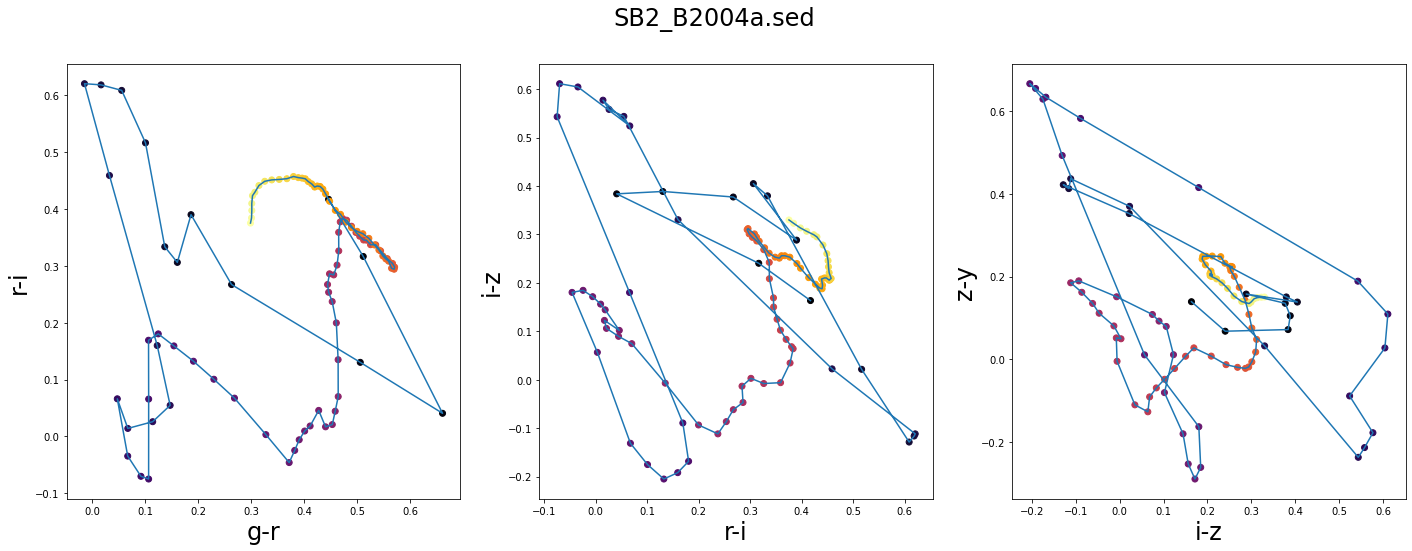

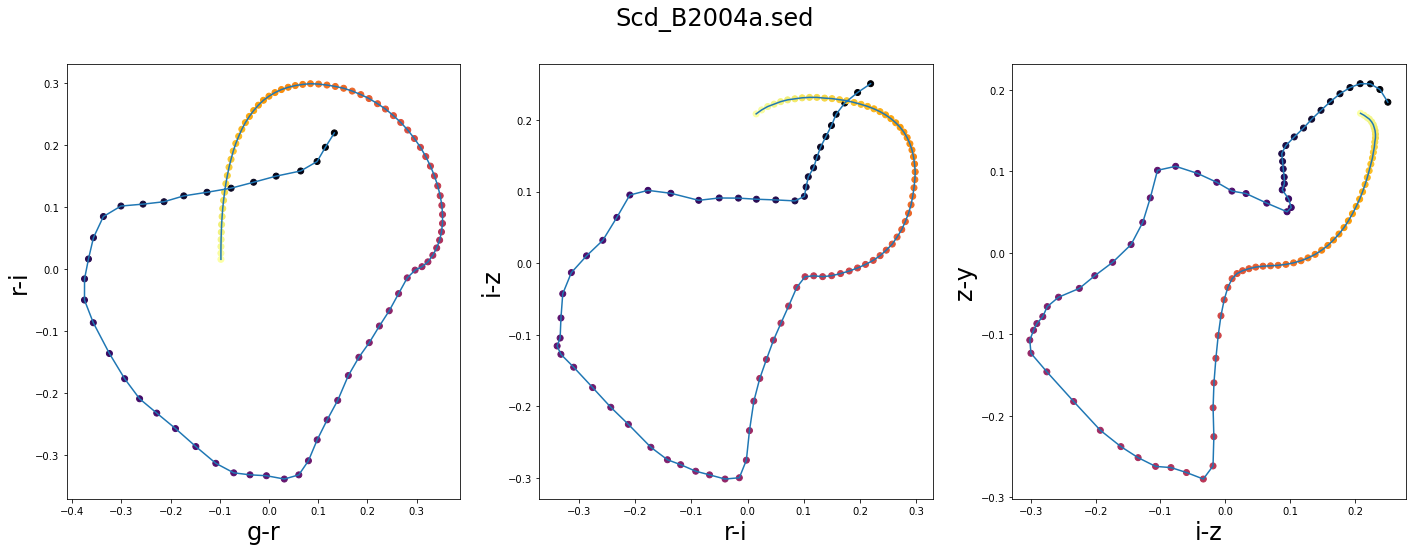

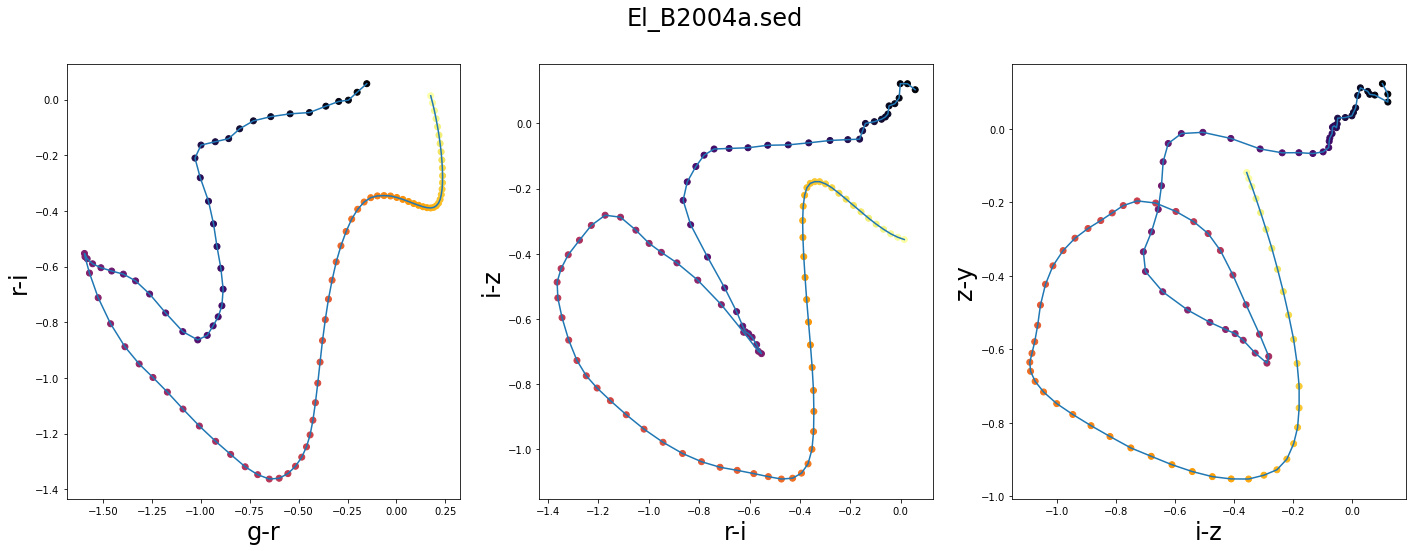

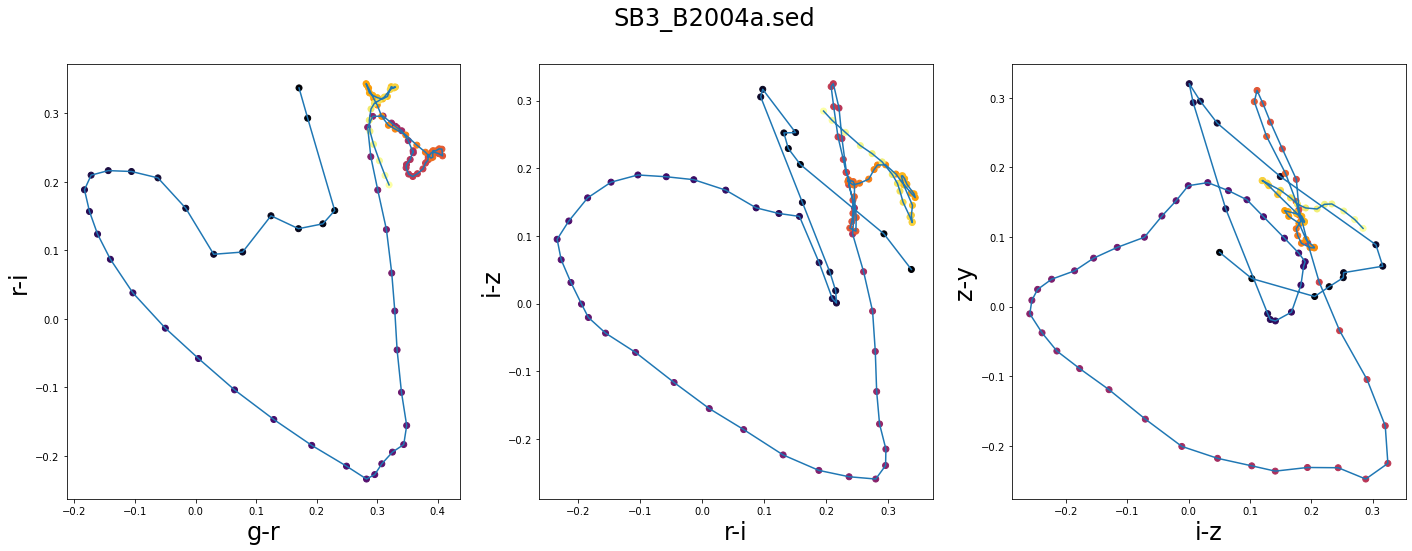

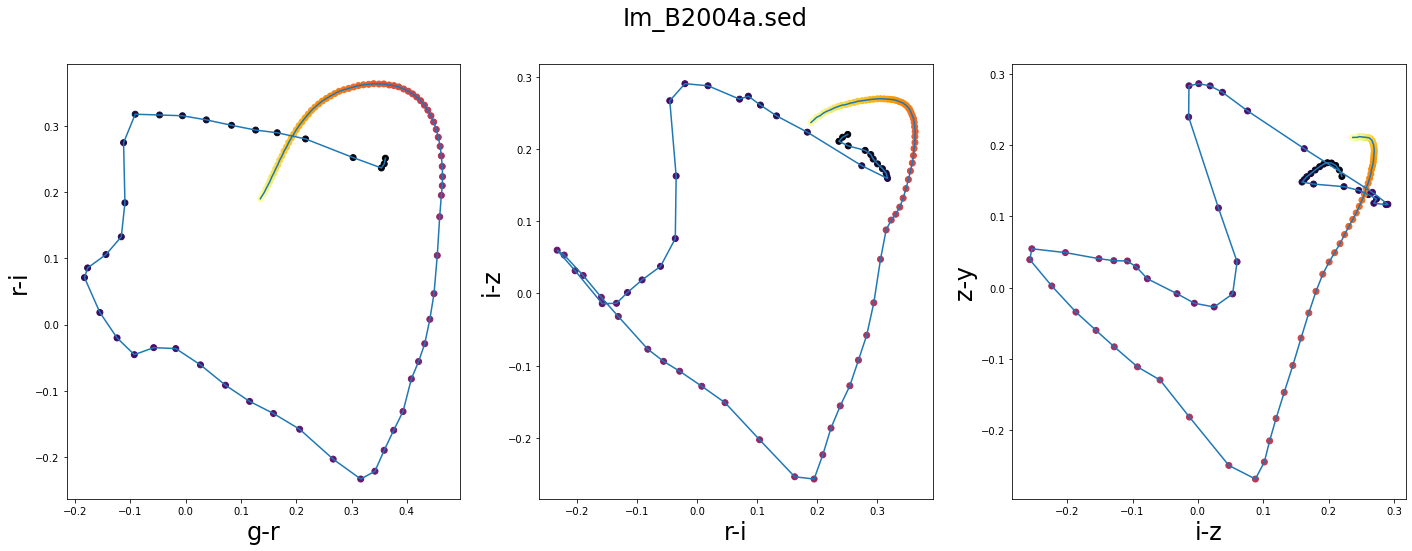

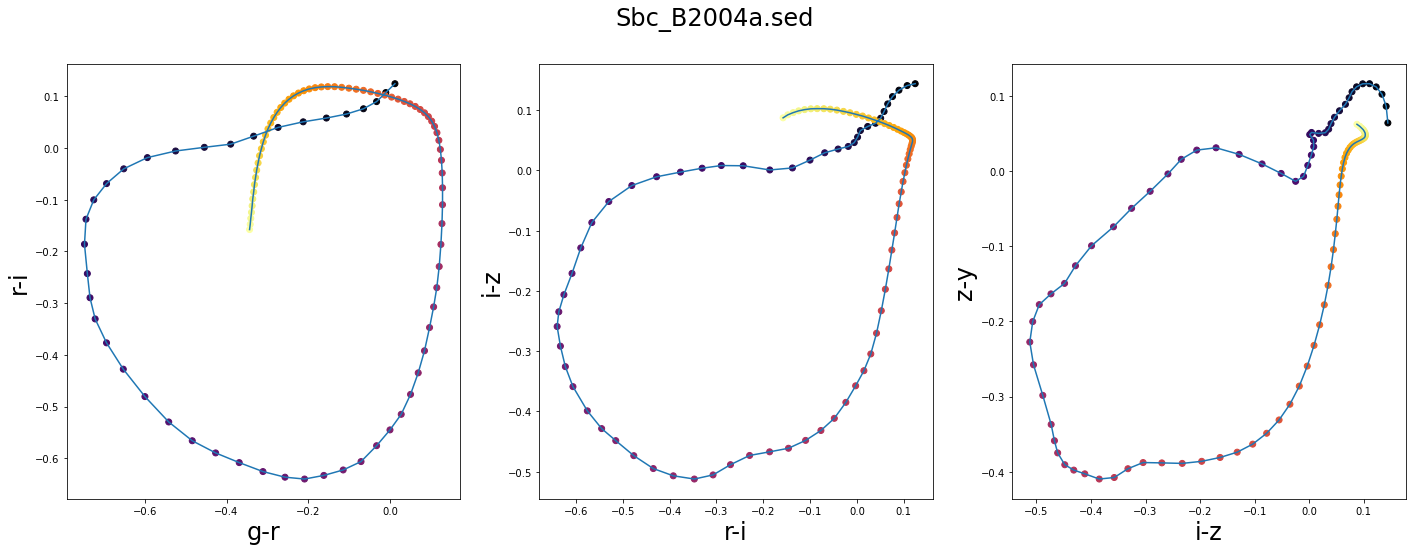

In [290]:
for filename in filelist:
    
    color1 = []
    color2 = []
    
    fig, ax = plt.subplots(1,3, figsize = (24, 8))


    for z in redshifts:
    
        color1.append(mags_dict[filename][z][0]) 
        color2.append(mags_dict[filename][z][1]) 
    
    ax0 = ax[0].scatter(color1, color2, cmap="inferno", c = redshifts)
    ax[0].plot(color1, color2)
    ax[0].set_xlabel('g-r', fontsize = 24)
    ax[0].set_ylabel('r-i', fontsize = 24)

    color1 = []
    color2 = []

    for z in redshifts:
    
        color1.append(mags_dict[filename][z][1]) 
        color2.append(mags_dict[filename][z][2]) 
    
    ax[1].scatter(color1, color2, cmap="inferno", c = redshifts)
    ax[1].plot(color1, color2)
    ax[1].set_xlabel('r-i', fontsize = 24)
    ax[1].set_ylabel('i-z', fontsize = 24)

    color1 = []
    color2 = []

    for z in redshifts:
    
        color1.append(mags_dict[filename][z][2])
        color2.append(mags_dict[filename][z][3])
    
    ax[2].scatter(color1, color2, cmap="inferno", c = redshifts)
    ax[2].plot(color1, color2)
    ax[2].set_xlabel('i-z', fontsize = 24)
    ax[2].set_ylabel('z-y', fontsize = 24)
    
    fig.suptitle(filename, fontsize = 24)
    
plt.show()

In [237]:
?plt.colorbar

In [170]:
filename = Scd_B2004a.sed

color1 = []
color2 = []

for z in np.linspace(0, 3, 50):
    
    color1.append(mags_dict[filename][z][0])
    color2.append(mags_dict[filename][z][1])
    
plt.scatter(color1, color2, cmap="plasma", c = np.linspace(0, 3, 50))
plt.colorbar()
plt.show()

color1 = []
color2 = []

for z in np.linspace(0, 3, 50):
    
    color1.append(mags_dict[filename][z][1])
    color2.append(mags_dict[filename][z][2])
    
plt.scatter(color1, color2, cmap="plasma", c = np.linspace(0, 3, 50))
plt.colorbar()
plt.show()

color1 = []
color2 = []

for z in np.linspace(0, 3, 50):
    
    color1.append(mags_dict[filename][z][2])
    color2.append(mags_dict[filename][z][3])
    
plt.scatter(color1, color2, cmap="plasma", c = np.linspace(0, 3, 50))
plt.colorbar()
plt.show()

[-0.6408168110254913,
 -0.6351753102376136,
 -0.6492466014100629,
 -0.6717801595636104,
 -0.6991284321209861,
 -0.7305550728219288,
 -0.768956729718667,
 -0.8105383273265367,
 -0.8442674825806122,
 -0.8799483475649623,
 -0.9252814533673082,
 -0.9812135704720539,
 -1.0458541780122843,
 -1.1197892124066762,
 -1.196368236354477,
 -1.2715087149611755,
 -1.3627194800666302,
 -1.4632758452213288,
 -1.5538339241075185,
 -1.6315955089396041,
 -1.701692485441324,
 -1.7762790188039759,
 -1.844407032109256,
 -1.9093334527919978,
 -1.9720802789290346,
 -2.025520321200112,
 -2.0650673788966394,
 -2.083196531315309,
 -2.080057188726453,
 -2.0700044870087027,
 -2.052862172574855,
 -2.0316911912750015,
 -2.0105998523476636,
 -1.9736429413154255,
 -1.9314461524275792,
 -1.8769461474500488,
 -1.8180130100161804,
 -1.754531690530385,
 -1.6814792807640053,
 -1.614394014357881,
 -1.551922047700259,
 -1.4881163052396396,
 -1.4262425254312987,
 -1.3658024699908466,
 -1.3045730121577002,
 -1.243782571523937,
